In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as maths
import random as rnd
import homeostat

## Modelling the homeostat

The homeostat takes an iterative process of generating theta values, that help update the weights. 

Within a step through time, we calculate the input sum going into the system. This gathers the sum of the $\theta$ values for each unit $i$, and the final index $m-1$. The value of $\theta$ is multiplied by the weight which corresponds to each other unit. 

$I=\sum_{i=0}^{n}(\theta_{i,m-1} \times w_{i})$

Once the input sum is gathered, we perform the integration. The input sum $I$ is placed within an equation that takes biased values $k$, $l$, $p$, $q$ and $\dot{\theta }$ representing a set of velocities, accessed at the last iteration $i-1$. 

$\ddot{\theta }_{i}=-k\dot{\theta }_{i-1}+l(p-q)I$

This is used to calculate the acceleration of the system. We then integrate this to calculate the velocity. 

$\dot{\theta }_{i}=\dot{\theta }_{i-1}+\ddot{\theta }_{i-1}dt$

This is further integrated to get the position $\theta$.

$\theta_{i}=\theta_{i-1}+\dot{\theta }_{i-1}dt$

We now have $\theta_{i}$ where $i$ is the current position. This position is checked against our lower and upper bound to enforce where the position has exceeded our limits. If so, the theta value is set to the bound and our velocity is set to 0.

$(\theta_{i}>B_u \rightarrow \theta_{i}=B_u,\dot{\theta }_i = 0)\wedge (\theta_{i}<B_l \rightarrow \theta_{i}=B_l,\dot{\theta }_i = 0)$

Once the ingeration has taken place, the system can update weights based on whether or not the signal is viable. Viability defines the optimal width between two bounds. In nature, this can be approximated to having a body temperatur of around 37 degrees celcius. The weights can be adjusted through a number of ways, one of which is randomly with negative feedback. This replaces all the weights with random values between 1 and -1. 

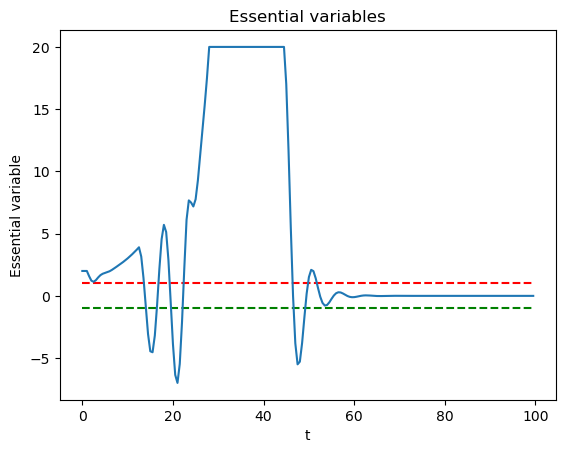

In [18]:
#define homeostat
hom = homeostat.Homeostat()

#define parameters
n_units = 1
upper_limit = 20
lower_limit = -20
upper_viability = 1
lower_viability = -1
test_interval = 10

#intialize homeostat
hom.init(n_units,upper_limit,lower_limit,upper_viability,lower_viability,test_interval)

#define loop parameters
dt=0.5
t = 0
ts = [t]
duration = 100
count=0
#time loop
while t < duration:
    hom.step(dt)
    t += dt
    ts.append(t)
    count+=1
#shope output
b=hom.getUnit(0,count)
nump_hom=np.asarray(b).view(np.float32)

plt.plot(ts[0:len(nump_hom)],[upper_viability for i in range(len(ts[0:len(nump_hom)]))], 'r--', label='upper viable boundary')
plt.plot(ts[0:len(nump_hom)],[lower_viability for i in range(len(ts[0:len(nump_hom)]))], 'g--', label='lower viable boundary')
for i in range(n_units):
    b=hom.getUnit(i,count)
    nump_hom=np.asarray(b).view(np.float32)
    plt.plot(ts[0:len(nump_hom)],nump_hom)
plt.title('Essential variables')
plt.xlabel('t')
plt.ylabel('Essential variable')
plt.show()